In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

import src

ships = np.load('data/not_selected.npy', allow_pickle=True)
inspections = set(src.get_inspections()['IMO'].unique())
noncompliances = {ship: ship in inspections for ship in ships}
portcalls = pd.read_pickle('data/portcalls_v3.pkl').loc[lambda x: x['ship'].isin(ships)]
portcalls['noncompliances'] = [noncompliances[ship] for ship in portcalls['ship'].values]
portcalls['port country'] = portcalls['port'].str[:2]
country_2 = portcalls['port'].str[:2].unique()
url = "https://gist.github.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv"
country_3 = pd.read_csv(url).apply(lambda x: x.str.replace('"', "").str.strip()).set_index('Alpha-2 code')['Alpha-3 code'].to_dict()

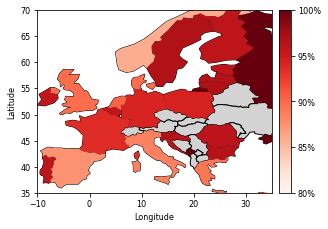

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.at[43, 'iso_a3'] = 'FRA' 
world.at[21, 'iso_a3'] = 'NOR'

country_2 = portcalls['port'].str[:2].unique()
url = "https://gist.github.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv"
country_3 = pd.read_csv(url).apply(lambda x: x.str.replace('"', "").str.strip()).set_index('Alpha-2 code')['Alpha-3 code'].to_dict()
result = {country_3[country]: np.mean([noncompliances[i] for i in country_df['ship'].unique()]) for country, country_df in portcalls.groupby(['port country'])}
world.loc[lambda x: x['iso_a3'].isin(result), 'result'] = [result[i] for i in world.loc[lambda x: x['iso_a3'].isin(result), 'iso_a3']]

with plt.rc_context({'font.size': 8, 'legend.fontsize': 8, 'legend.title_fontsize': 8}):
    fig, ax = plt.subplots(1, 1, figsize=(4.6, 4.6*.75))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    world.loc[lambda x: x['continent'] == 'Europe'].plot(facecolor='lightgrey', edgecolor='black', ax=ax)
    world.plot(column='result', ax=ax, cax=cax, legend=True, vmin=.8, vmax=1, cmap='Reds')
    ax.set_xlim(-10,35)
    ax.set_ylim(35,70)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    cax.set_yticks([.8, .85, .9, .95, 1])
    cax.set_yticklabels(['80%', '85%', '90%', '95%', '100%'])
    fig.tight_layout()
    fig.savefig("fig/port-world.pdf");

In [7]:
result = portcalls.replace({'port country': country_3})['port country'].value_counts()
result

ESP    464088
GBR    342149
ITA    319184
GRC    253918
DEU    179497
NLD    166605
NOR    163668
FRA    160142
SWE    131225
FIN    121131
BEL     91830
DNK     57971
POL     49418
IRL     45498
EST     42795
PRT     34657
LVA     24592
GIB     23861
MLT     19457
ROU     18209
LTU     15618
HRV     12661
BGR     12272
CYP     10541
ISL      9239
SVN      7211
MNE        14
RUS        10
SJM         5
CAN         1
Name: port country, dtype: int64

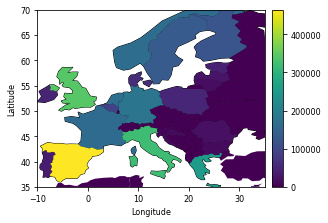

In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.at[43, 'iso_a3'] = 'FRA' 
world.at[21, 'iso_a3'] = 'NOR'

result = portcalls.replace({'port country': country_3})['port country'].value_counts()

with plt.rc_context({'font.size': 8, 'legend.fontsize': 8, 'legend.title_fontsize': 8}):
    fig, ax = plt.subplots(1, 1, figsize=(4.6, 4.6*.75))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    world.loc[lambda x: x['continent'] == 'Europe'].plot(facecolor='lightgrey', edgecolor='black', ax=ax)
    world.join(result, on='iso_a3', how='left').fillna({'port country': 0}).plot(column='port country', ax=ax, cax=cax, legend=True, vmin=0)
    ax.set_xlim(-10,35)
    ax.set_ylim(35,70)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    # cax.set_yticks([.8, .85, .9, .95, 1])
    # cax.set_yticklabels(['80%', '85%', '90%', '95%', '100%'])
    fig.tight_layout()
    # fig.savefig("fig/port-world.pdf");

In [9]:
pd.Series(result).sort_values(ascending=False).head(5).index

Index(['ESP', 'GBR', 'ITA', 'GRC', 'DEU'], dtype='object')

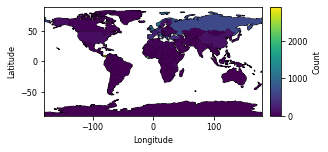

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.at[43, 'iso_a3'] = 'FRA' 
world.at[21, 'iso_a3'] = 'NOR'
result = portcalls.groupby('ship')['flag_code'].last().replace(country_3).value_counts()

with plt.rc_context({'font.size': 8, 'legend.fontsize': 8, 'legend.title_fontsize': 8}):
    fig, ax = plt.subplots(1, 1, figsize=(4.6, 2.3))

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    
    world.plot(facecolor='lightgrey', edgecolor='black', ax=ax)
    world.join(result, on='iso_a3', how='left').fillna({'flag_code': 0}).plot(column='flag_code', legend=True, ax=ax, cax=cax, legend_kwds={'label': 'Count'})

    ax.set_xlim(-180,180)
    ax.set_ylim(-90,90)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.tight_layout()
    plt.savefig("fig/flag-count.pdf");

In [7]:
result.head(5)

PAN    2904
MHL    2153
LBR    2119
MLT    1834
NLD    1080
Name: flag_code, dtype: int64

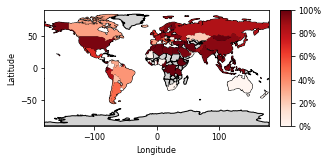

In [12]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.at[43, 'iso_a3'] = 'FRA' 
world.at[21, 'iso_a3'] = 'NOR'
result = portcalls.replace({'flag_code': country_3}).groupby('flag_code')['noncompliances'].mean()

with plt.rc_context({'font.size': 8, 'legend.fontsize': 8, 'legend.title_fontsize': 8}):
    fig, ax = plt.subplots(1, 1, figsize=(4.6,2.3))

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    world.plot(facecolor='lightgrey', edgecolor='black', ax=ax)
    world.join(result, on='iso_a3', how='right').plot(column='noncompliances', legend=True, ax=ax, cax=cax, cmap='Reds')

    ax.set_xlim(-180,180)
    ax.set_ylim(-90,90)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    cax.set_yticks(np.linspace(0, 1, 6))
    cax.set_yticklabels([f'{100*i:n}%' for i in np.linspace(0, 1, 6)])
    plt.tight_layout()
    plt.savefig("fig/flag-fraction.pdf");

In [9]:
result

flag_code
ALB    0.997086
ARE    0.341772
ARG    0.500000
ATG    0.999003
AUS    0.000000
         ...   
VIR    0.000000
VNM    0.888889
VUT    0.883488
WSM    1.000000
ZAF    0.000000
Name: noncompliances, Length: 139, dtype: float64

In [10]:
result.sort_values(ascending=True).head(10)

flag_code
ZAF    0.0
MRT    0.0
NGA    0.0
GGY    0.0
NZL    0.0
OMN    0.0
GTM    0.0
HND    0.0
SLV    0.0
GUY    0.0
Name: noncompliances, dtype: float64